## FINANCIAL SERVICES USE IN TANZANIA

### Background

#### The training dataset contains demographic information and what financial services are used by approximately 10,000 individuals across Tanzania. This data was extracted from the FSDT Finscope 2017 survey and prepared specifically for this challenge.

#### Each individual is classified into four mutually exclusive categories:

#### No_financial_services: Individuals who do not use mobile money, do not save, do not have credit, and do not have insurance
#### Other_only: Individuals who do not use mobile money, but do use at least one of the other financial services (savings, credit, insurance)
 #### Mm_only: Individuals who use mobile money only
#### Mm_plus: Individuals who use mobile money and also use at least one of the other financial services (savings, credit, insurance)






### Insight gathered and observation from the Data set :

   ##### - Mobile money users are mostly middle age  maried individual
   ##### - People who are mobile money users are almost always afilliated with one or finacial services.
   ##### - There is an interesting correlation between land ownership and mobile money users.
   ##### - Married are most likely to own mobile money.
   ##### - Education have impact on mobile money ownership.
   

# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import __version__
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib.patches import ConnectionPatch




  #         Examining dataset

In [2]:
#Getting the data
training  = pd.read_csv('training.csv')

#Viewing the first 3 columns
training.head(3)



,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2


###  Checking for missing values

In [3]:
print("Number of columns with missing values: {}".format(len(training.columns[training.isnull().any()])))

Number of columns with missing values: 0


## Discriptive Statistics 

#### a)  Renaming the columns for easly interpretation.

In [4]:
#Renaming  the columns

columns_names = {"Q1":"age_1", "Q2": "gender", "Q3":"marital_status",
                 "Q4":"education", "Q5":"residents", "Q6": "land_ownership",
                 "Q7": "mobile_phone_ownership", "Q8_1": "salaries_or_Wages",
                 "Q8_2": "trading", "Q8_3": "services", "Q8_4": "piece_work",
                 "Q8_5": "rental_income", "Q8_6": "interest", "Q8_7": "pension",
                 "Q8_8": "welfare", "Q8_9": "rely_on_someone", "Q8_10": "dependent",
                 "Q8_11": "other", "Q9": "employeer", "Q10": "trading_goods", 
                 "Q11": "type_of_Service", "Q12":"sent_money", "Q13": "transfer_money",
                 "Q14": "received_money", "Q15": "received_money_days", "Q16":"usage_goods_services", "Q17":"usage_bills",
                 "Q18": "literacy_in_kiswhahili", "Q19": "literacy_in_englis"}

training =training.rename(columns_names, axis=1)

#Adding categorical variables
gender_names = {1: "Male", 2: "Female"}
training["Gender"] = training["gender"].map(gender_names)

marital_names ={1: "Married", 2: "Divorced", 3: "Widowed", 4: "Single/Never Married"}
training["Marital Status"] = training["marital_status"].map(marital_names)

education_names = {1: "No Formal Education", 2: "Some Primary", 3: "Primary Completed", 4: "Post Primary", 5: "Some Secondary", 6: "University", 7: "Don't Know"}
training["Education"] = training["education"].map(education_names)

land_ownership_names = {1: "Yes", 2: "No"}
training["Land Ownership"] = training["land_ownership"].map(land_ownership_names)

usage_goods_services_names = {-1: "not applicable", 1: "Never", 2: "Daily", 3: "Weekly", 4: "Monthly", 5: "Less often than monthly"}
training["Usage_Goods_Service"] = training["usage_goods_services"].map(usage_goods_services_names)

usage_bills_names = {-1: "not applicable", 1: "Never", 2: "Daily", 3: "Weekly", 4: "Monthly", 5: "Less often than monthly"}
training["Usage Bills"] = training["usage_bills"].map(usage_bills_names)

mobile_money_classification_names = {0: "No Mobile Money and no other Financial Service", 1: "No Mobile Money, one other financial service", 2: "Mobile Money Only", 3: "Mobile Money plus"}
training["Mobile_Money_Classification"] = training["mobile_money_classification"].map(mobile_money_classification_names)



####  Getting basic descriptive statistics of the dataset

In [5]:
training.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7094,NaN,NaN,NaN,4742.63,2731.12,1,2397.25,4744.5,7105,9459
age_1,7094,NaN,NaN,NaN,38.2395,16.3321,16,25,35,48,100
gender,7094,NaN,NaN,NaN,1.55991,0.496433,1,1,2,2,2
marital_status,7094,NaN,NaN,NaN,1.78743,1.16516,1,1,1,3,4
education,7094,NaN,NaN,NaN,3.06005,1.55778,1,2,3,3,8
residents,7094,NaN,NaN,NaN,2.54891,1.53426,1,1,3,4,6
land_ownership,7094,NaN,NaN,NaN,1.84057,0.366103,1,2,2,2,2
mobile_phone_ownership,7094,NaN,NaN,NaN,1.39794,0.489508,1,1,1,2,2
salaries_or_Wages,7094,NaN,NaN,NaN,0.0621652,0.241472,0,0,0,0,1
trading,7094,NaN,NaN,NaN,0.63011,0.482809,0,0,1,1,1


The above table shows the basic descriptive statistics for each column in the dataset. 

# Relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

### Plotting total number of Mobile Money Classification Subcribers by their categories

In [6]:
training.head(5)

,ID,age_1,gender,marital_status,education,residents,land_ownership,mobile_phone_ownership,salaries_or_Wages,trading,...,borrowing,insurance,mobile_money_classification,Gender,Marital Status,Education,Land Ownership,Usage_Goods_Service,Usage Bills,Mobile_Money_Classification
0,5086,98,2,3,1,1,2,2,0,0,...,0,0,0,Female,Widowed,No Formal Education,No,Never,not applicable,No Mobile Money and no other Financial Service
1,1258,40,1,1,3,5,1,1,1,0,...,1,0,3,Male,Married,Primary Completed,Yes,Monthly,Monthly,Mobile Money plus
2,331,18,2,4,6,3,2,1,0,0,...,0,0,2,Female,Single/Never Married,University,No,Never,not applicable,Mobile Money Only
3,6729,50,1,1,3,1,1,1,0,0,...,1,0,3,Male,Married,Primary Completed,Yes,Monthly,not applicable,Mobile Money plus
4,8671,34,1,1,1,1,2,1,0,1,...,0,1,3,Male,Married,No Formal Education,No,Never,not applicable,Mobile Money plus


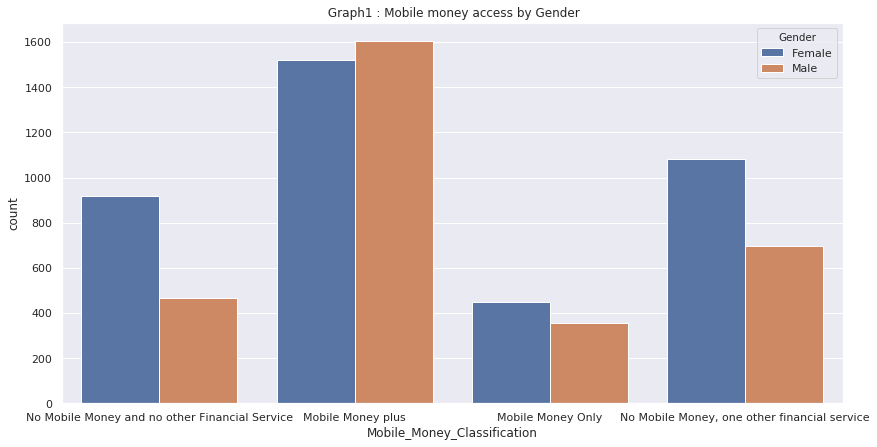

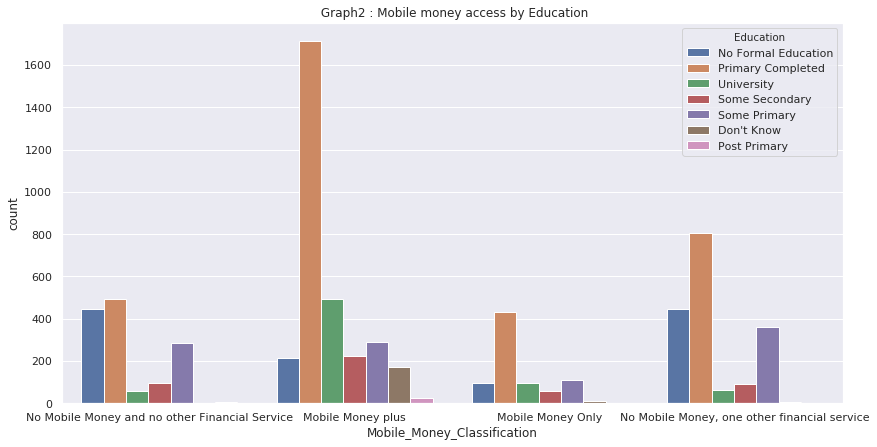

In [40]:


plt.figure(figsize=(14,7))
sns.countplot(training.Mobile_Money_Classification, hue=training['Gender'])
plt.title(' Graph1 : Mobile money access by Gender')
plt.show() 




plt.figure(figsize=(14,7))
sns.countplot(training.Mobile_Money_Classification, hue=training['Education'])
plt.title(' Graph2 : Mobile money access by Education')

plt.show()







Graph 1 compares mobile money users in accodance to their categories based on their gender,obsevations based on the bar graph illustrates that males own more mobile money and atleast one more financial services compared to females.

Graph 2: Mobile money acces by education, focuses on comparing education level with mobile money access and there is higher correlation between people who owns mobile money and the completion of primary education. 

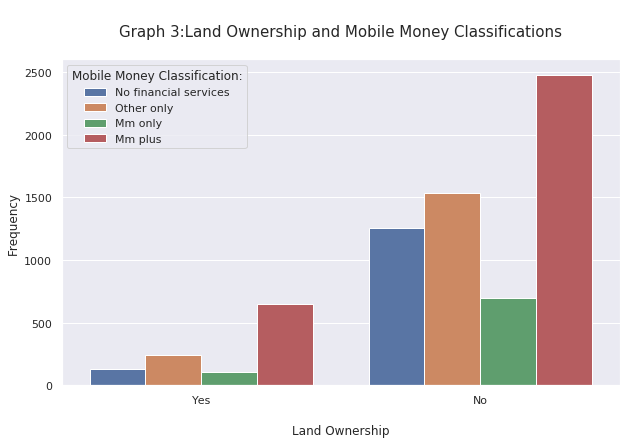

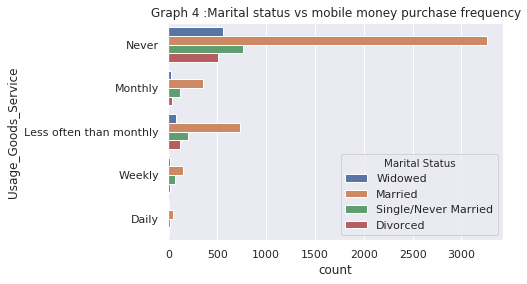

In [8]:
sns.set()
plt.figure(figsize = (10,6))
sns.countplot(x = 'land_ownership', hue = 'mobile_money_classification',data = training)
plt.title('\nGraph 3:Land Ownership and Mobile Money Classifications\n', fontsize = 15)
plt.xlabel('\nLand Ownership')
plt.ylabel('Frequency')
plt.legend(title = 'Mobile Money Classification:', labels = ['No financial services', 'Other only', 'Mm only', 'Mm plus'])
plt.xticks(np.arange(2), ['Yes', 'No'])
plt.show()




sns.countplot(hue='Marital Status', y='Usage_Goods_Service', data=training)
plt.title('Graph 4 :Marital status vs mobile money purchase frequency')
plt.show()

#### Graph 3 : Land ownership and Mobile money classification  clearly illustrate that there is a high number of people who do not own land and are not affiliated  with the use of mobile money, but on the other hand people who owns land have high frequency use of mobile money, and among all the other category, people who own land populate the category wherein they own mobile money plus one other financial services.


#### Graph 4 : Compares people based on their on their mariage status and their frequency use of mobile money,
#### because  there is high number of people who don"t own mobile money the ovarall and in all marital statuses is high in "never used mobile money class", married people tend to utillise mobile money more frequently more especially in a rang of monthly bases.

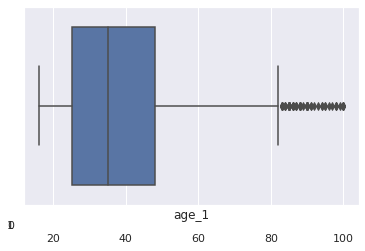

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (30.2, 0)})

x = training["age_1"]

sns.boxplot(x, ax=ax_box)

plt.show()


#### Age distribution of the dataset has a mean avarage age of 38 years old with the minimum age of 16, Meaning that there is a high possibility that the person who is likely to own mobile money is around the 30's.

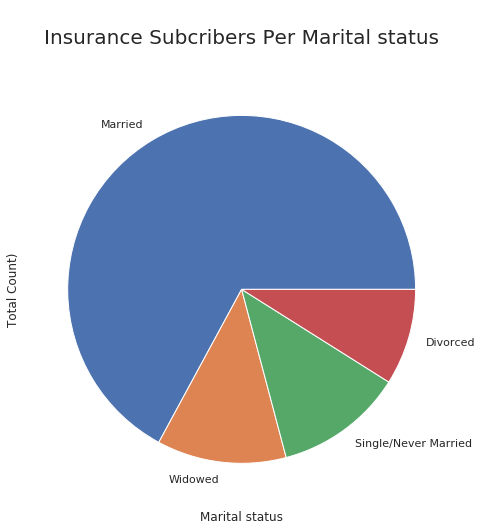

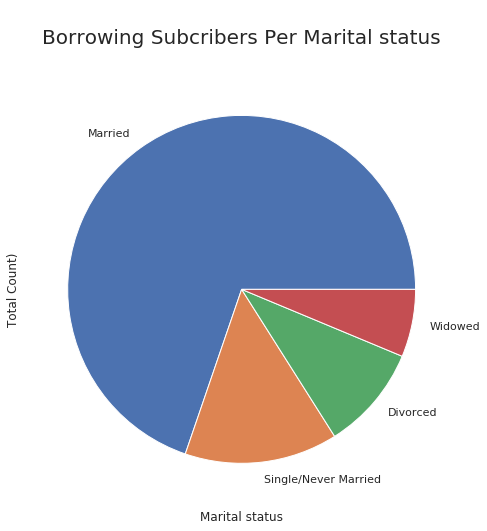

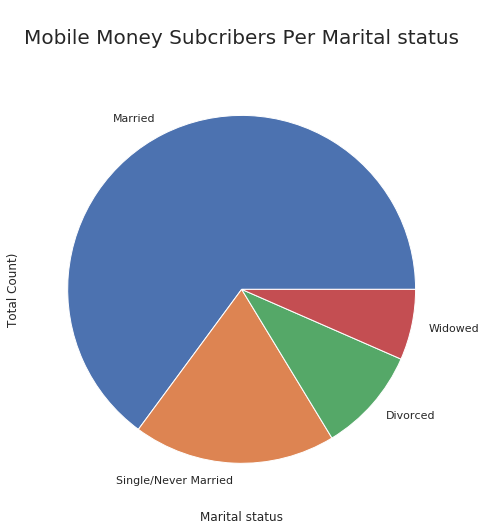

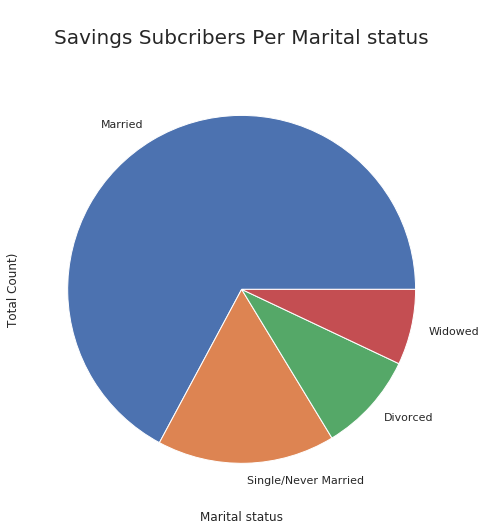

In [11]:
plt.subplots(figsize=(8, 8))
training[training.insurance==1].groupby('Marital Status').insurance.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nInsurance Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(8, 8))
training[training.borrowing==1].groupby('Marital Status').borrowing.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nBorrowing Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(8, 8))
training[training.mobile_money==1].groupby('Marital Status').mobile_money.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nMobile Money Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(8, 8))
training[training.savings==1].groupby('Marital Status').savings.count().sort_values(ascending=False).plot(kind='pie')
plt.title('\nSavings Subcribers Per Marital status\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Marital status')
plt.xticks(rotation=0)
plt.show()



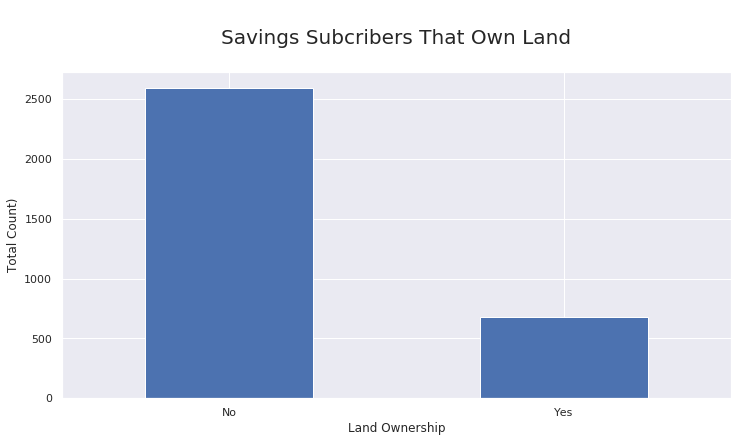

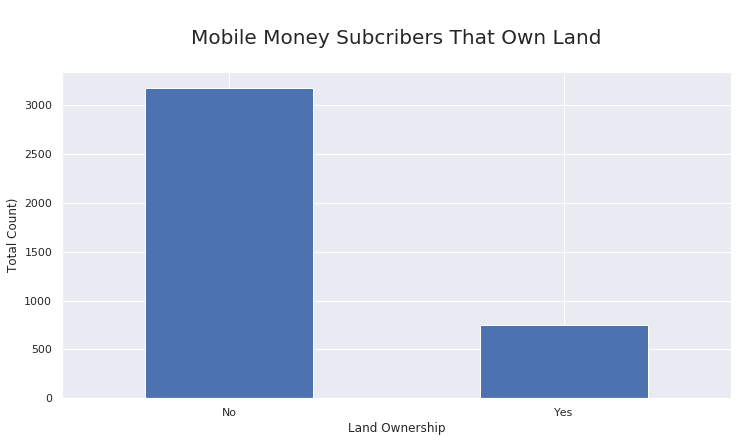

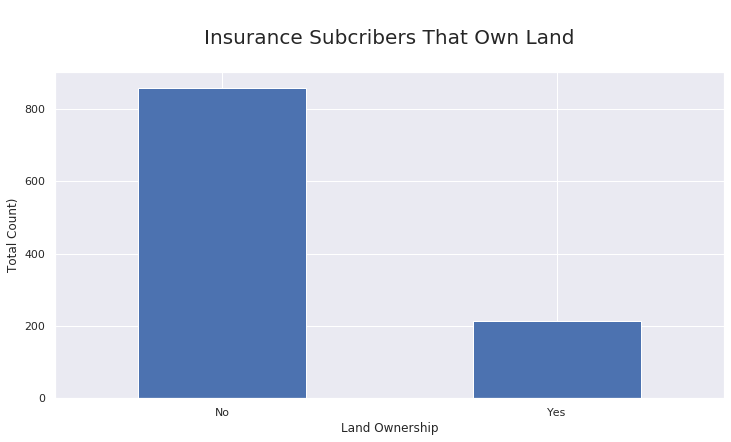

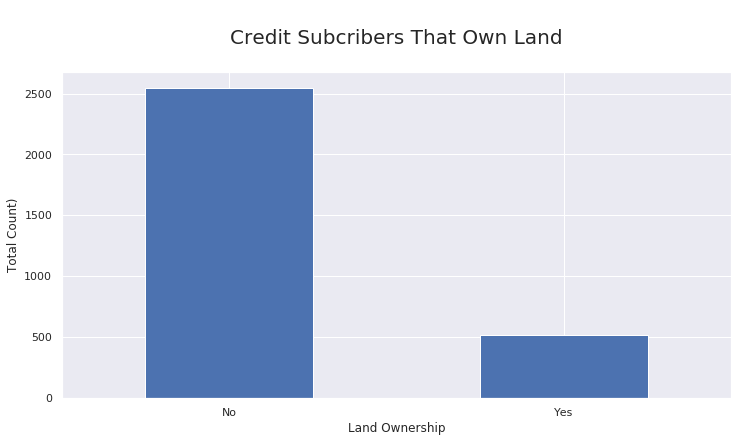

In [12]:
plt.subplots(figsize=(12, 6))
training[training.savings==1].groupby('Land Ownership').savings.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nSavings Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(12, 6))
training[training.mobile_money==1].groupby('Land Ownership').mobile_money.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nMobile Money Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(12, 6))
training[training.insurance==1].groupby('Land Ownership').insurance.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nInsurance Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()

plt.subplots(figsize=(12, 6))
training[training.borrowing==1].groupby('Land Ownership').borrowing.count().sort_values(ascending=False).plot(kind='bar')
plt.title('\nCredit Subcribers That Own Land\n',fontsize=20)
plt.ylabel('Total Count)')
plt.xlabel('Land Ownership')
plt.xticks(rotation=0)
plt.show()
# borrowing
# insurance

In [13]:
from geopy.geocoders import Nominatim
import folium

lat = -6.3728253 ; lon = 34.8924826
Country_map = folium.Map(location=[lat, lon], zoom_start=6)

In [14]:
for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_9'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'green',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map



In [15]:
for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_5'):
    folium.CircleMarker(
        [lat, long],
        radius = 5,
        color = 'yellow',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map

for lat, lng, label in zip(training[training.mobile_money == 1].Latitude, 
                           training[training.mobile_money == 1].Longitude, 
                           str(training.ID)):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.4,
        parse_html=False).add_to(Country_map) 

In [16]:
for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_1'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'yellow',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_2'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'blue',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_3'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'brown',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_4'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'black',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_5'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'orange',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map


for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_6'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'white',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map





for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_8'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'grey',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map



for lat, long, label in zip(training['Latitude'],training['Longitude'],'Q8_7'):
    folium.CircleMarker(
        [lat, long],
        radius = 10,
        color = 'red',
        parse_htmtl=False
    ).add_to(Country_map)
Country_map




# Conclusion

####  Amongst all the people who were interviewed the group that is more #dominant is the one that do not use mobile money.The category that # is has a potential growth in mobile money market is the  one that #is mostly dominated by middle aged individual who owns land. The  #"Mm_plus: Individuals who use mobile money and also use at least #one of the other financial services (savings, credit, insurance)"

#### Relationship status does not seem to have impact on mobile money usage but there is a correlation between married people and affiliation with financial services.
#### Comparing males and females, There are more males who uses mobile money.

#### Interestingly mobile money users own land more compared to those individuals who do not use mobile money.
#### The source of income and location of individual have have an impact  on whether the individual owns mobile money or not...

#### The potential growth and target market for financial service providers would be an individual who is in 30's, married and own the land.The source of income would also play a very important role and determining the potential client as people who are employed thend to own mobile money more than other individuals who relie on other means as source of income.


